# <데이터 랭글링> 3장
### 데이터 정제
##### -이름 바꾸기
##### -정렬과 재순서화
##### -데이터 유형 변환
##### -중복 데이터 처리
##### -결측 데이터나 잘못된 데이터 처리
##### -원하는 데이터 부분 집합으로 필터링하기

### 데이터 변환
##### -데이터의 행과 열을 변경하는 작업
##### -**넓은 형태와 긴 형태의 데이터**

# 4장
### 데이터 강화(데이터 보강작업, 데이터를 추가해 데이터 품질 개선.)
##### -새로운 열 추가 : 기존 열의 데이터에 함수 적용해 새로운 컬럼 생성
##### -데이터 이산화: 연속형 데이터나 구별되는 값이 많은 이산형 데이터를 구간으로 변환
##### -집계: 데이터를 모으고 요약
##### -재표본추출: 시계열 데이터를 특정 간격으로 집계

# Wide vs. Long Format Data
# 넓은 형태와 긴 형태의 데이터

## About the data
**daily temperature data** from the [National Centers for Environmental Information (NCEI) API](https://www.ncdc.noaa.gov/cdo-web/webservices/v2). We will use the Global Historical Climatology Network - Daily (GHCND) dataset for the Boonton 1 station (GHCND:USC00280907); see the documentation [here](https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf).

## Setup

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

wide_df = pd.read_csv('data/wide_data.csv', parse_dates=['date'])
long_df = pd.read_csv(
    'data/long_data.csv', 
    usecols=['date', 'datatype', 'value'], 
    parse_dates=['date']
)[['date', 'datatype', 'value']] # sort columns

## Wide format
**아래는 넓은 형태의 기온 데이터**

TMAX, TMIN, TOBS는 측정되는 변수, 값들은 관측값을 나타낸다.

최고기온, 최저기온, 관측 시의 기온

In [2]:
wide_df.head(6)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9
5,2018-10-06,20.0,13.3,16.1


요약통계 - describe()메서드

In [3]:
wide_df.describe(include='all', datetime_is_numeric=True)

,date,TMAX,TMIN,TOBS
count,31,31.000000,31.000000,31.000000
mean,2018-10-16 00:00:00,16.829032,7.561290,10.022581
min,2018-10-01 00:00:00,7.800000,-1.100000,-1.100000
25%,2018-10-08 12:00:00,12.750000,2.500000,5.550000
50%,2018-10-16 00:00:00,16.100000,6.700000,8.300000
75%,2018-10-23 12:00:00,21.950000,13.600000,16.100000
max,2018-10-31 00:00:00,26.700000,17.800000,21.700000
std,NaN,5.714962,6.513252,6.596550


It's easy to graph with `pandas` (covered in chapter 5):

#### NOTE

폰트 설정

In [20]:
import matplotlib.pyplot as mpl
import platform

# rc는그래프의 스타일, 레이아웃 및 기타 속성을 설정
from matplotlib import font_manager as fm, rc

# 맥OS일 경우
if platform.system() == 'Darwin':
    mpl.rcParams["font.family"] = 'AppleGothic'

elif platform.system() == 'Windows':
    font_name = fm.FontProperties(fname=path).get_name()
    mpl.rcParams["font.family"] = font_name
elif platform.system() == 'Linux':
    mpl.rcParams['font.family'] = 'NanumGothic'

#그림에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

#mpl.rcParams["font.family"] = 'AppleGothic'

간단히 그래프 그리기

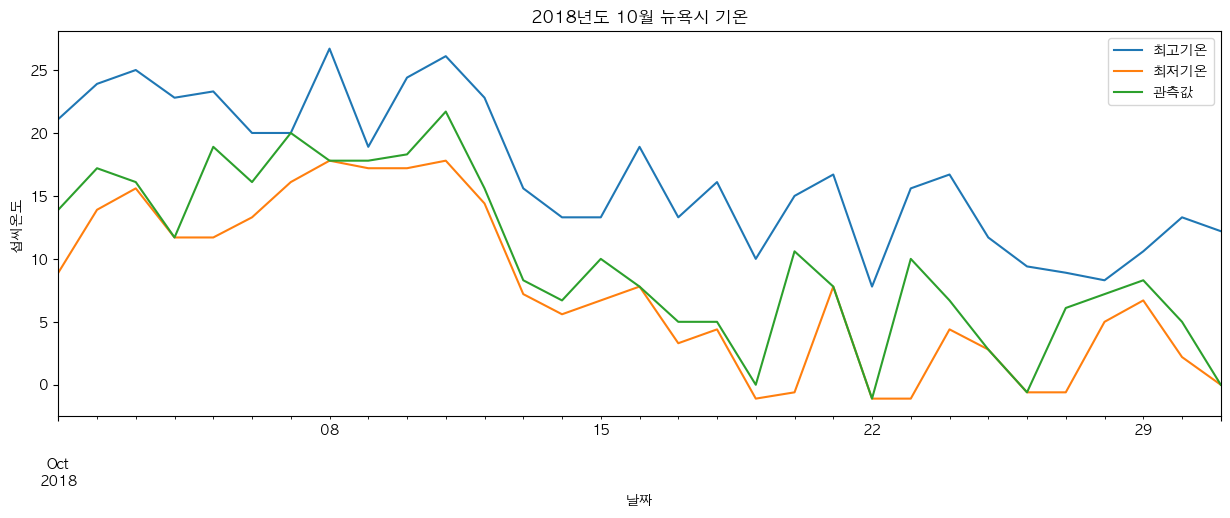

In [12]:
wide_df.plot(
    x='date', y=['TMAX', 'TMIN', 'TOBS'], #x에 date컬럼, y에 TMAX. TMIN, TOBS 컬럼리스트
    figsize=(15, 5), #가로 세로 그래프 길이
    title='2018년도 10월 뉴욕시 기온'
).set(xlabel = '날짜', ylabel='섭씨온도') #표시되는 x라벨. y라벨
plt.legend(['최고기온', '최저기온', '관측값'])
plt.show()

## Long format
**긴 형태의 데이터**

관측한 날마다 TMAX, TMIN, TOBS 값이 datatype의 컬럼에 들어가게 된다.

In [13]:
long_df.head(6)

,date,datatype,value
0,2018-10-01,TMAX,21.1
1,2018-10-01,TMIN,8.9
2,2018-10-01,TOBS,13.9
3,2018-10-02,TMAX,23.9
4,2018-10-02,TMIN,13.9
5,2018-10-02,TOBS,17.2


**3개의 행씩 같은 date로** 데이터가 들어있기 때문에 

요약통계 `describe()`가 유용하진 않다.

In [14]:
long_df.describe(include='all', datetime_is_numeric=True)

,date,datatype,value
count,93,93,93.000000
unique,NaN,3,NaN
top,NaN,TMAX,NaN
freq,NaN,31,NaN
mean,2018-10-16 00:00:00,NaN,11.470968
min,2018-10-01 00:00:00,NaN,-1.100000
25%,2018-10-08 00:00:00,NaN,6.700000
50%,2018-10-16 00:00:00,NaN,11.700000
75%,2018-10-24 00:00:00,NaN,17.200000
max,2018-10-31 00:00:00,NaN,26.700000


Plotting long format data in `pandas` can be rather tricky. Instead we use `seaborn` (covered in [`ch_06/1-introduction_to_seaborn.ipynb`](../ch_06/1-introduction_to_seaborn.ipynb)):

긴 형태의 데이터는 이용하기 어려우며 확실히 데이터를 제공하는 방법으로 사용해서는 안 된다.

하지만, 그림을 그리는 라이브러리가 변수 이름으로 선의 색을 설정하고 특정 변수의 값으로 점의 크기를 조정하며, 

면을 나누는 시각화는 쉽게 할 수 있다.

**pandas는 그림을 그리는데 쓰는 데이터를 넓은 형태의 데이터라고 예상하므로** 

긴 형태의 데이터를 그릴 때에는 **seaborn** 을 사용한다.

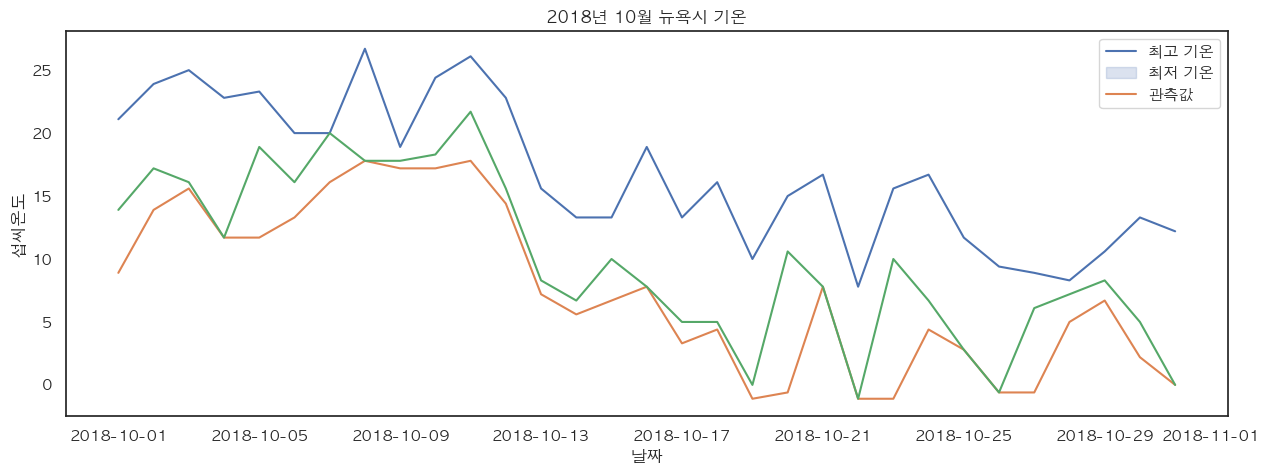

In [25]:
import seaborn as sns

sns.set(rc={'figure.figsize': (15, 5), 'axes.unicode_minus':False}, 
        style='white', 
        font = 'AppleGothic')

ax = sns.lineplot(
    data=long_df, x='date', y='value', hue='datatype'
    #seaborn은 열의 항목에 대해 선의 색(hue)를 지정할 수 있다.
)
ax.set_ylabel('섭씨온도')
ax.set_xlabel('날짜')
ax.legend(['최고 기온', '최저 기온', '관측값'])
ax.set_title('2018년 10월 뉴욕시 기온')
plt.show()

`seaborn`을 이용해서 긴 형태읟 데이터를 **서브 플롯, 하위플롯(facet)** 으로 나누어 그림을 그리기 좋다.

In [28]:
type(axes)

numpy.ndarray

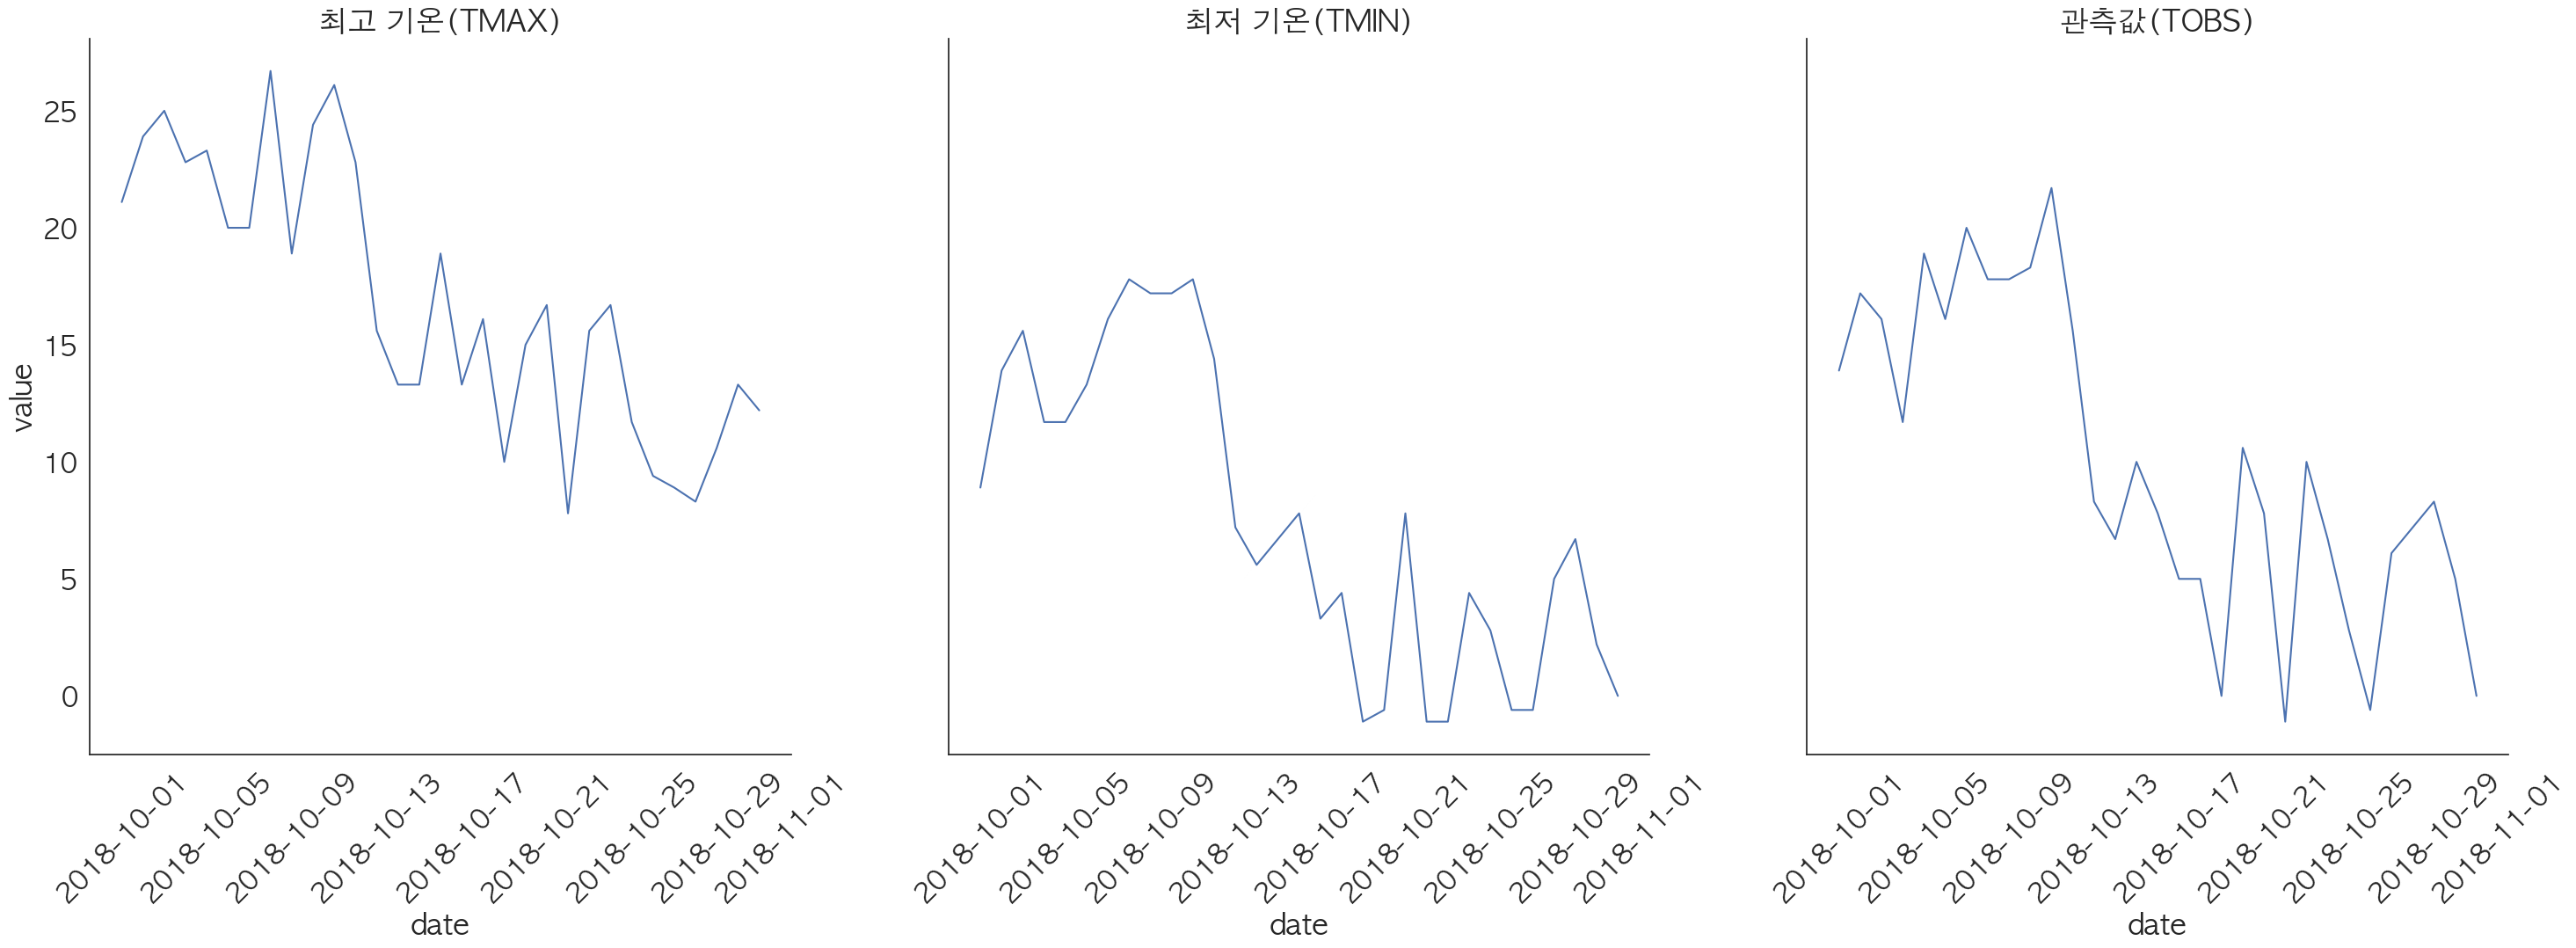

In [26]:
sns.set(rc={'figure.figsize': (20, 10), 
            'axes.unicode_minus':False}, 
        style='white', 
        font = 'AppleGothic',
       font_scale = 2)

#datetype으로 세 분류로 나누기 /type(g) : seaborn.axisgrid.FacetGrid
g = sns.FacetGrid(long_df, col='datatype', height=10)
#x축은 date, y축은 value
g = g.map(plt.plot, 'date', 'value') 
g.set_titles(size=25)
g.set_xticklabels(rotation=45)

#type(axes) : numpy.ndarray / 각각에 제목을 세팅해주기 위해 넘파이배열로 변환
axes = g.axes.flatten()
axes[0].set_title('최고 기온(TMAX)')
axes[1].set_title('최저 기온(TMIN)')
axes[2].set_title('관측값(TOBS)')
plt.show()

pandas와 matplotlib으로 위와 같이 그림을 그릴 수 있지만, seaborn을 사용하면 더 복잡한 그림의 조합을 더 쉽게 그릴 수 있다.

<hr>
<div>
    <a href="../ch_02/6-adding_and_removing_data.ipynb">
        <button style="float: left;">&#8592; Chapter 2</button>
    </a>
    <a href="./2-using_the_weather_api.ipynb">
        <button style="float: right;">Next Notebook &#8594;</button>
    </a>
</div>
<br>
<hr>